In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0

uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

# Exercício 10

## a)

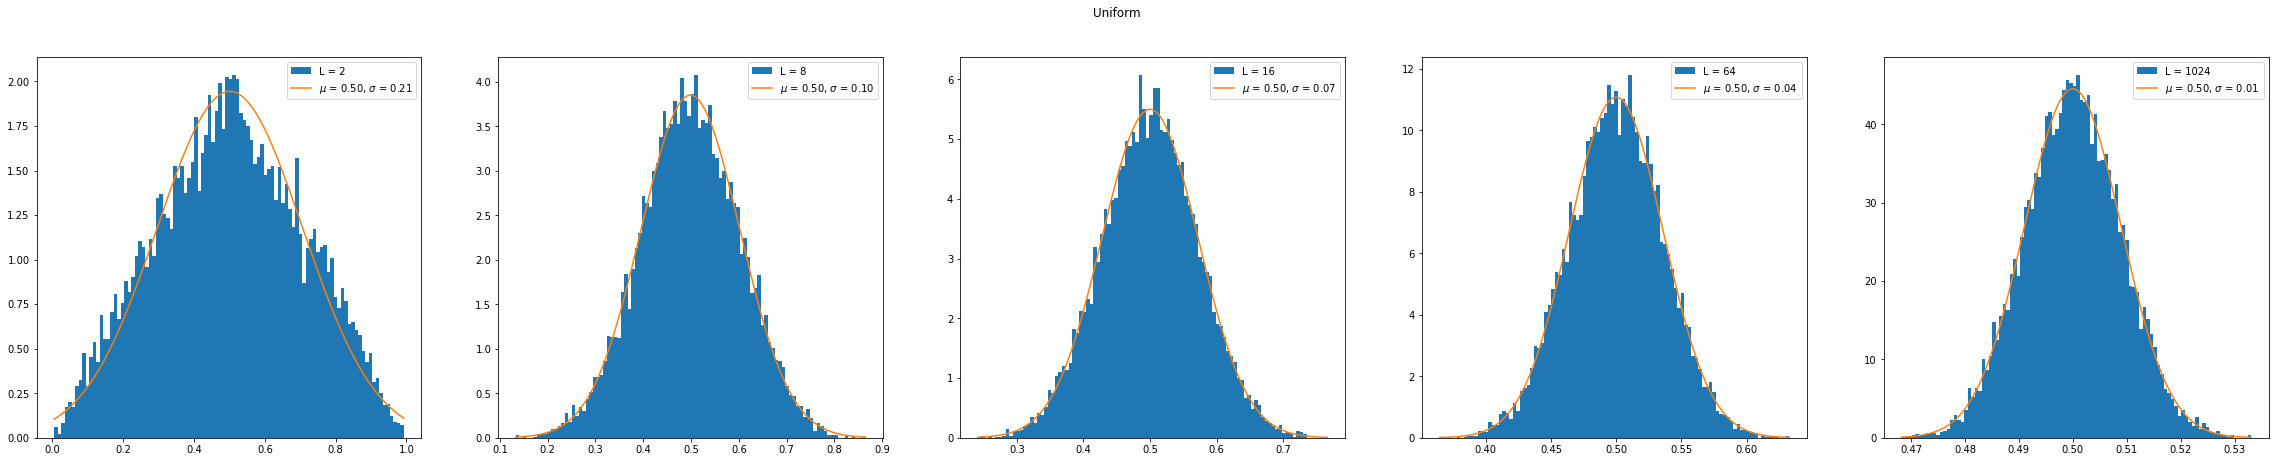

In [2]:
fig, ax = plt.subplots(1, 5, figsize=(40,7), facecolor="white")

fig.suptitle('Uniform')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.uniform(0, 1, N) for a in range(L[i])]
    z = []
    for j in range(N):
        s = 0
        for k in range(L[i]):
            s += samples[k][j]
        s /= L[i]
        z.append(s)
    avg = sum(z)/len(z)
    sigma = np.sqrt(sum([(zi-avg)**2/len(z) for zi in z]))
    x = np.linspace(min(z), max(z), 10000)
    ax[i].hist(z, bins=100, density=True, label=f'L = {L[i]}')
    ax[i].plot(x, stats.norm.pdf(x, avg, sigma), label=f'$\mu$ = {avg:.2f}, $\sigma$ = {sigma:.2f}')
    ax[i].legend()

## b)

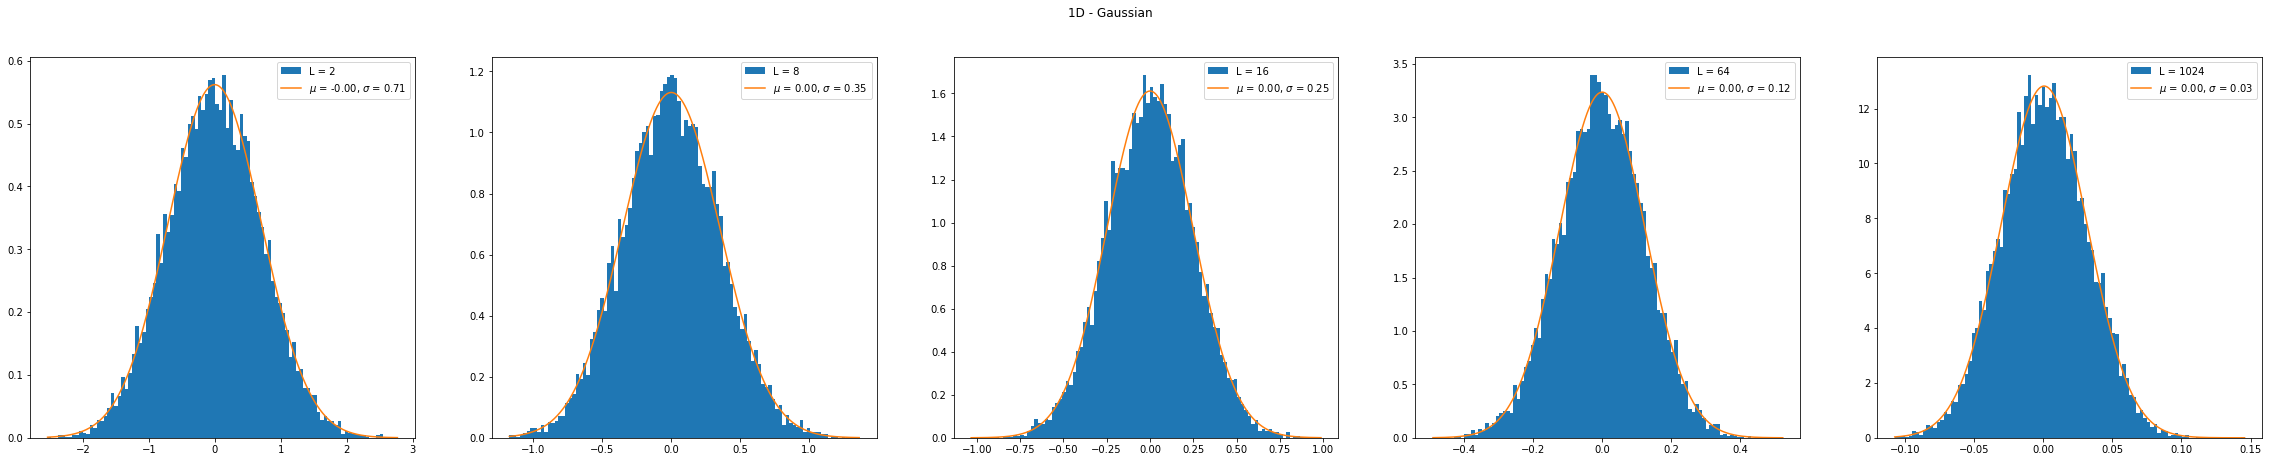

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(40,7), facecolor="white")

fig.suptitle('1D - Gaussian')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.normal(0, 1, N) for a in range(L[i])]
    z = []
    for j in range(N):
        s = 0
        for k in range(L[i]):
            s += samples[k][j]
        s /= L[i]
        z.append(s)
    min_z = min(z)
    max_z = max(z)
    avg = sum(z)/len(z)
    sigma = np.sqrt(sum([(zi-avg)**2/len(z) for zi in z]))
    x = np.linspace(min_z, max_z, 10000)
    ax[i].hist(z, bins=100, density=True, label=f'L = {L[i]}')
    ax[i].plot(x, stats.norm.pdf(x, avg, sigma), label=f'$\mu$ = {avg:.2f}, $\sigma$ = {sigma:.2f}')
    ax[i].legend()

## c)

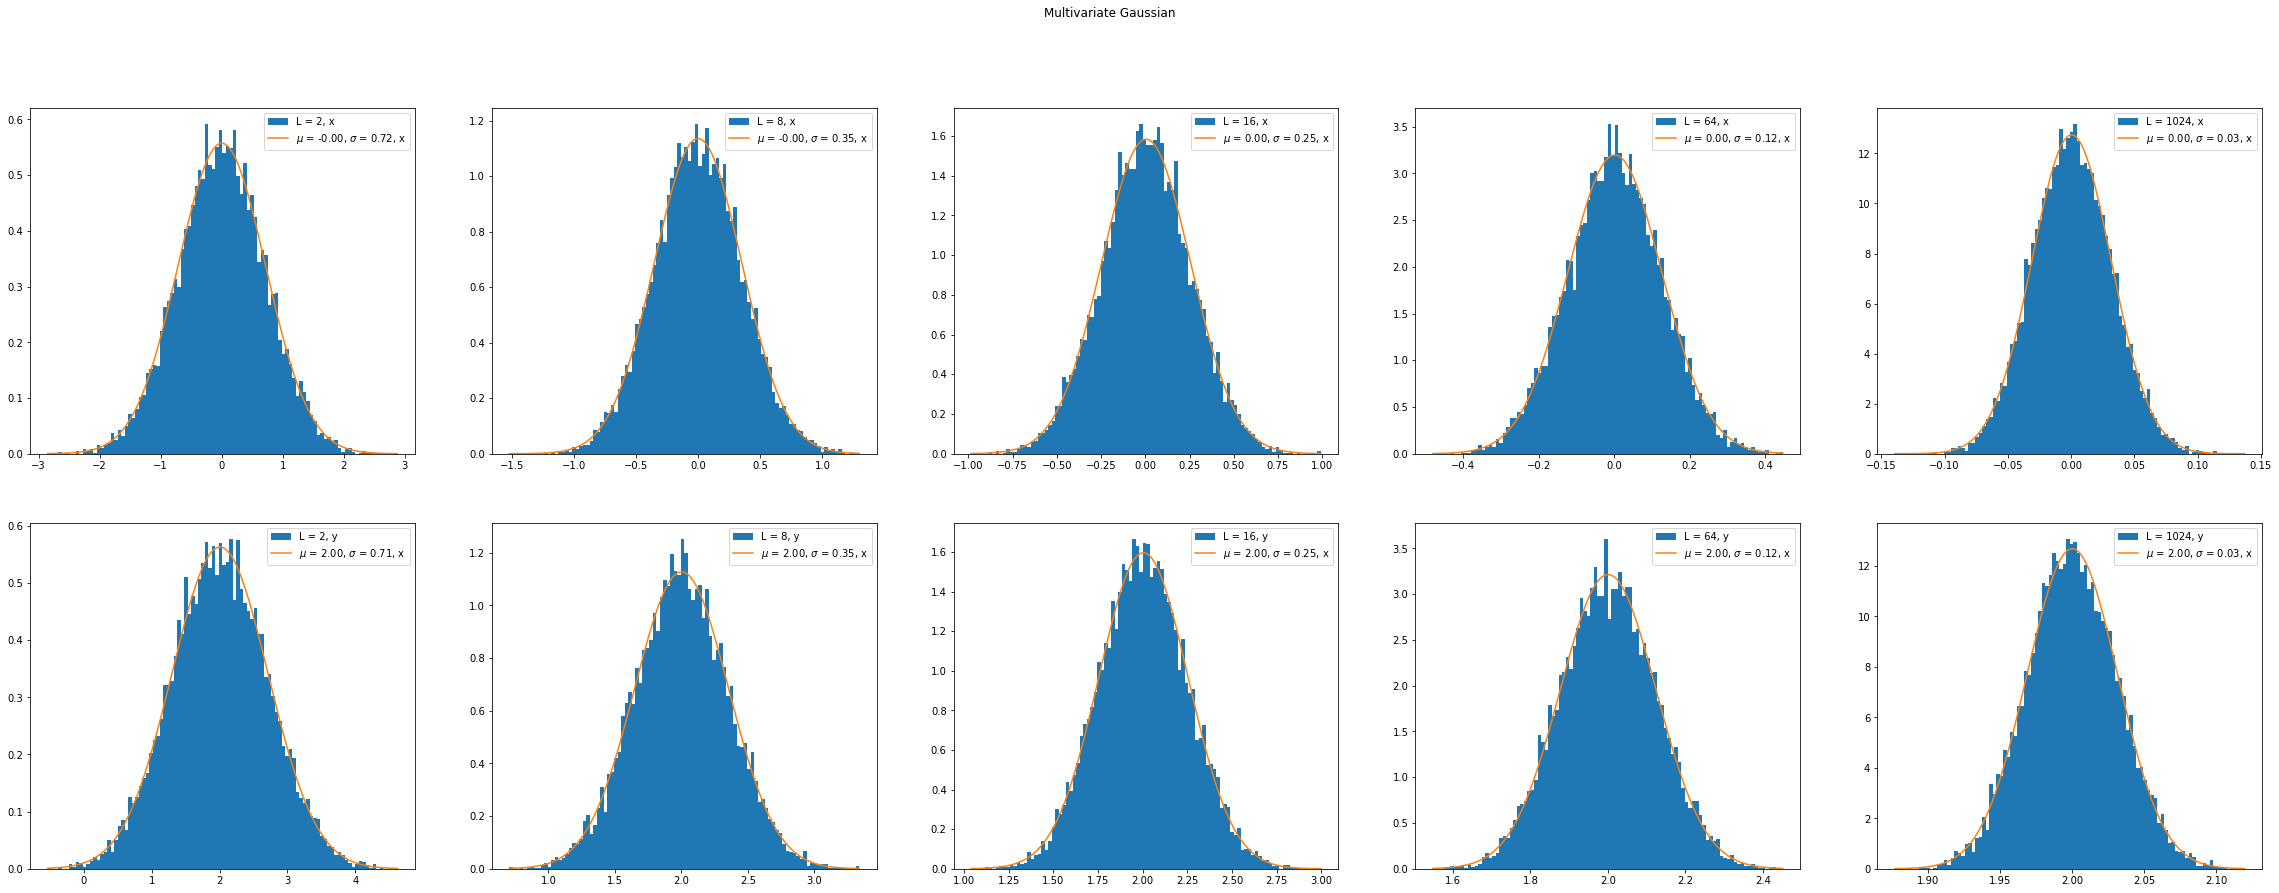

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(40,14), facecolor="white")

fig.suptitle('Multivariate Gaussian')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.multivariate_normal([0,2], [[1, 0.5],[0.5, 1]], N) for a in range(L[i])]
    z = []
    for j in range(N):
        x = sum([samples[k][j][0] for k in range(L[i])])/L[i]
        y = sum([samples[k][j][1] for k in range(L[i])])/L[i]
        z.append([x, y])
    x = [zi[0] for zi in z]
    y = [zi[1] for zi in z]
    avg = [sum([xi for xi in x])/len(x), sum([yi for yi in y])/len(y)]
    sigma = [np.sqrt(sum([(xi - avg[0])**2/len(x) for xi in x])), np.sqrt(sum([(yi - avg[1])**2/len(y) for yi in y]))]

    a = np.linspace(min(x), max(x), 10000)
    b = np.linspace(min(y), max(y), 10000)

    ax[0][i].hist(x, bins=100, density=True, label=f'L = {L[i]}, x')
    ax[0][i].plot(a, stats.norm.pdf(a, avg[0], sigma[0]), label=f'$\mu$ = {avg[0]:.2f}, $\sigma$ = {sigma[0]:.2f}, x')
    ax[0][i].legend()
    ax[1][i].hist(y, bins=100, density=True, label=f'L = {L[i]}, y')
    ax[1][i].plot(b, stats.norm.pdf(b, avg[1], sigma[1]), label=f'$\mu$ = {avg[1]:.2f}, $\sigma$ = {sigma[1]:.2f}, x')
    ax[1][i].legend()
    
